# 1 Importing python packages

In [89]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno

# 2 Exploratory Data Analysis

source of data: https://www.kaggle.com/datasets/ychope/loan-approval-dataset/data

## 2.1 Feature Glossary

**Loan & Application Characteristics**
- loan_limit: Indicates whether the loan amount falls within conforming loan limits or exceeds regulatory thresholds
- approv_in_adv: Whether the Loan has been approved in advance, before formal application submission
- loan_type: Type of loan 
- loan_purpose: Purpose of Loan e.g. home purchase, refinancing
- submission_of_application: The channel through which the loan application was submitted (e.g., online, broker, branch)
- year: Calendar year when the loan was accepted or rejected

**Applicant's profile**
- Unnamed: 0 : Anonimized applicant's name
- id: Loan applicant ID
- gender: Gender of loan applicant
- age: Age category of the applicant
- income: Annual income of loan applicant
- senior_age: Indicates whether the applicant falls into a senior age group
- region: Geographic region of loan applicant

**Credit History**
- credit_worthiness: Categorical assessment of the applicant’s overall credit risk profile
- open_credit: Indicates whether the applicant has open lines of credit at the time of application
- co-applicant_credit_type: Credit history classification of the co-applicant, if present
- credit_type: Type of credit history or bureau record associated with the applicant
- credit_score: Applicant's credit score, summarizing the applicant’s creditworthiness


**Loan & Payment Structure**
- loan_amount: Loan amount
- rate_of_interest: Loan interest rate (If approved. NaN if the loan is not approved)
- interest_rate_spread: Difference between the loan’s interest rate and a benchmark reference rate
- term: Duration of the loan repayment period, measured in months
- neg_ammortization: Indicator of whether the loan allows negative amortization
- interest_only: Specifies whether the loan permits interest-only payments for an initial period
- lump_sum_payment: Indicates whether a lump-sum or balloon payment is required at maturity
- high_interest_rate: Flag identifying loans with interest rates above a predefined threshold

**Fees**
- upfront_charges: Fees charged at loan origination, including processing or administrative costs

**Property & Collateral Information**
- property_value: Appraised or estimated value of the collateral property
- ltv: Ratio of the loan amount to the property value, a key risk metric
- construction_type: Classification of the property’s construction 
- occupancy_type: Indicates whether the property is owner-occupied, rented, or secondary residence
- secured_by: Type of asset used to secure the loan
- security_type: Classification of the collateral or lien structure securing the loan
- total_units: Number of residential units associated with the property

**Business & Usage**
- business_or_commercial: Business loan or commercial loan

**Debt &Affordability Indicators**
- dtir1: Ratio of total debt obligations to income

**Target Variable**
- status: Loan outcome indicating approval or rejection

## 2.2 Checking the basic info of the data

check: info, shape, variable types and description

In [57]:
# loading dataset into pandas dataframe
# set header to 0 to keep feature names
# set header to 1 to drop feature names

df_loan = pd.read_csv("data\\Loan.csv", delimiter=",", header=0)

In [3]:
print(df_loan.columns)

Index(['Unnamed: 0', 'id', 'year', 'loan_limit', 'gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')


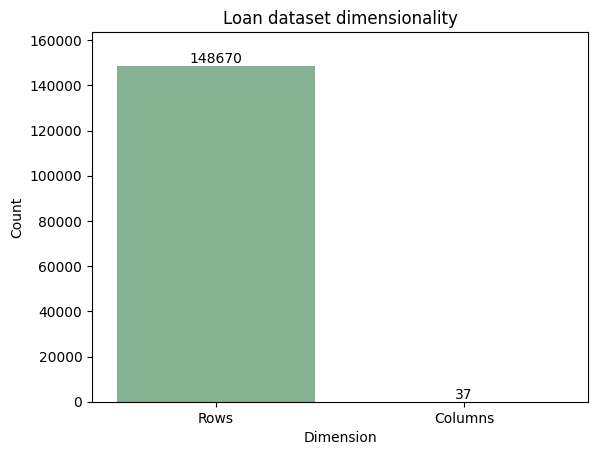

In [4]:
# type((df_loan.shape)) is a tuple

n_rows, n_cols = df_loan.shape
data_dimensionality = {"Dimension": ["Rows", "Columns"], "Count": [n_rows, n_cols]}
# load data into a DataFrame object
df_dimensionality = pd.DataFrame(data_dimensionality)

sns.set_palette("crest")
ax = sns.barplot(data=df_dimensionality, x="Dimension", y="Count")


for container in ax.containers:
    ax.bar_label(container, fontsize=10)
ax.margins(y=0.1)

plt.title("Loan dataset dimensionality")
plt.show()

### 2.2.1 Check data types

In [5]:
type(df_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   credit_worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           148670 non-null  float64
 13  interest_rate_spread       11

NoneType

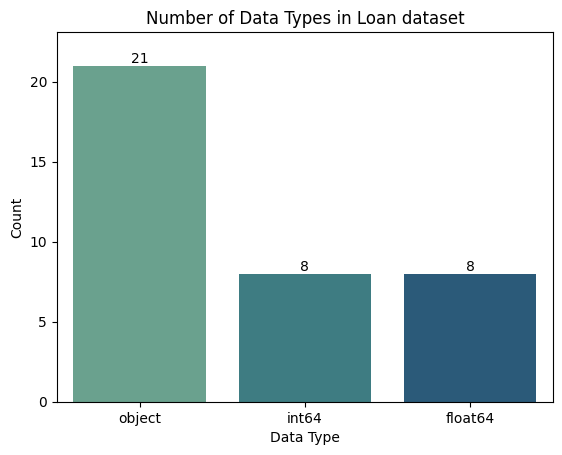

In [6]:
# count the data types
dtype_count = df_loan.dtypes.value_counts()

# add new index to make it into a Dataframe by reset_index()
df_dtypes = dtype_count.reset_index()

# rename the colums in the new Dataframe
df_dtypes = df_dtypes.set_axis(["Data Type", "Count"], axis=1)

ax = sns.barplot(df_dtypes, x="Data Type", y="Count", palette="crest", hue="Data Type")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.margins(y=0.1)
plt.title("Number of Data Types in Loan dataset")
plt.show()

In [7]:
# Conclusion:
# it's a heterogenous dataset as it presents nomerical and categorical features

### 2.2.2 Check Missing values

In [8]:
# create a dictionary to store feature names + number null values
null_values: dict[str, int] = {}
for var in df_loan.columns:
    nr: int = df_loan[var].isnull().sum()
    if nr > 0:
        null_values[var] = nr

# convert Dictionary into a Dataframe
df_count_null_val = pd.DataFrame(
    null_values.items(), columns=["Features", "Number of null values"]
)

# sort the Dataframe
df_count_null_val_sorted = df_count_null_val.sort_values(
    ["Number of null values"], ascending=False
).reset_index(drop=True)

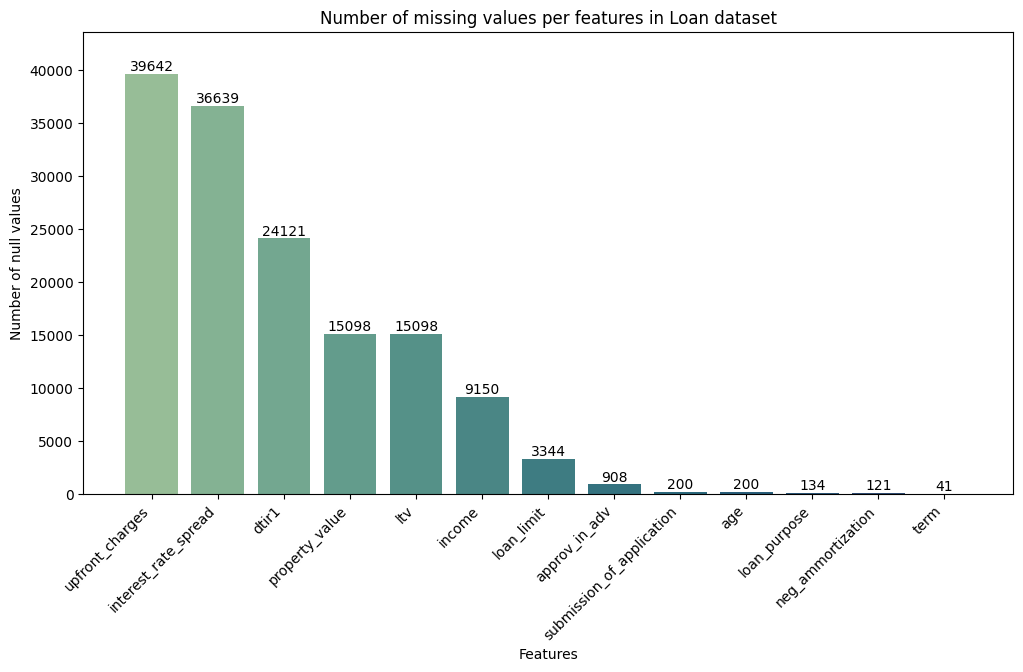

In [9]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    df_count_null_val_sorted,
    x=df_count_null_val_sorted.columns[0],
    y=df_count_null_val_sorted.columns[1],
    palette="crest",
    hue="Features",
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.autoscale_view()
ax.margins(y=0.1)
plt.xticks(rotation=45, ha="right")
plt.title("Number of missing values per features in Loan dataset")
plt.show()


In [10]:
## Counting missing and valid values in the Dataframe

missing_val_count = df_loan.isnull().sum().sum()
print(f"Total missing values {missing_val_count} in the dataframe")

valid_val_count = df_loan.notnull().sum().sum()
print(f"Total valid values {valid_val_count} in the dataframe")

## Overall missing rate of the dataset
overall_missing_rate = round(missing_val_count / valid_val_count * 100, 2)
print(f"Missing rate {overall_missing_rate}%")

# reminder: plotting barchart

Total missing values 144696 in the dataframe
Total valid values 5356094 in the dataframe
Missing rate 2.7%


In [11]:
## Number of complete rows where no missing values occur
complete_row_count = df_loan.notna().all(axis=1).sum()
print(f"The number of complete rows is: {complete_row_count}")
print(
    f"{(complete_row_count / len(df_loan)) * 100:.2f}%  of the rows are complete in the dataframe"
)

# reminder: plotting barchart

The number of complete rows is: 98187
66.04%  of the rows are complete in the dataframe


In [12]:
## Check duplicated rows
duplicated_row_count = df_loan.duplicated().sum()

# reminder: plotting barchart

## 2.3 Exploratory Data Analysis for numerical features

In [205]:
# select only numeric-type values
df_loan_numeric = df_loan.select_dtypes(include=[np.number])
df_loan_numeric

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,high_interest_rate,senior_age
0,986500,4.125,0.6174,9825.00,360.0,1408000.0,13380.0,864,70.063920,0,42.0,1,0
1,406500,3.625,-0.1990,1100.00,360.0,1008000.0,5640.0,505,40.327381,0,40.0,0,1
2,166500,4.250,0.7779,2379.51,180.0,338000.0,4740.0,829,49.260355,0,29.0,1,1
3,206500,5.625,1.1174,6117.50,360.0,278000.0,3780.0,763,74.280576,0,44.0,1,0
4,166500,3.500,0.1533,779.88,360.0,168000.0,2400.0,886,99.107143,0,42.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,156500,3.875,0.4172,4370.00,360.0,198000.0,2460.0,670,79.040404,0,37.0,0,1
148666,106500,4.125,1.8843,3007.81,240.0,128000.0,8460.0,720,83.203125,0,22.0,1,1
148667,256500,3.990,0.7559,1688.89,240.0,528000.0,3720.0,775,48.579545,0,49.0,0,1
148668,326500,4.125,0.6865,4475.75,360.0,378000.0,5400.0,787,86.375661,0,38.0,1,0


### 2.3.1 Variability of numeric values

In [14]:
# axis=0 means counting unique values feature by feature (column by column)
df_loan_numeric.nunique(axis=0)

Unnamed: 0              148670
id                      148670
year                         1
loan_amount                211
rate_of_interest           132
interest_rate_spread     22516
upfront_charges          58271
term                        26
property_value             385
income                    1001
credit_score               401
ltv                       8484
status                       2
dtir1                       57
high_interest_rate           2
senior_age                   2
dtype: int64

In [15]:
# Concolusion:
#  'Unnamed:0', 'id' and 'year' columns aren't necessary, they do not bring any valuable info to the model
#   we can drop them
df_loan_numeric.drop(columns=["Unnamed: 0", "id", "year"], inplace=True)

# the features status, high_interest_rate, senior_age have variability of two
# thus we need two check the distribution of the values
# see it below

### 2.3.2 Univariate analysis for numerical data

In [16]:
# numeric_colum_names = df_loan_numeric.columns
n = len(df_loan_numeric.columns)
print(n)
cols = 3

# round a number up to the nearest integer
rows = math.ceil(n / cols)

13


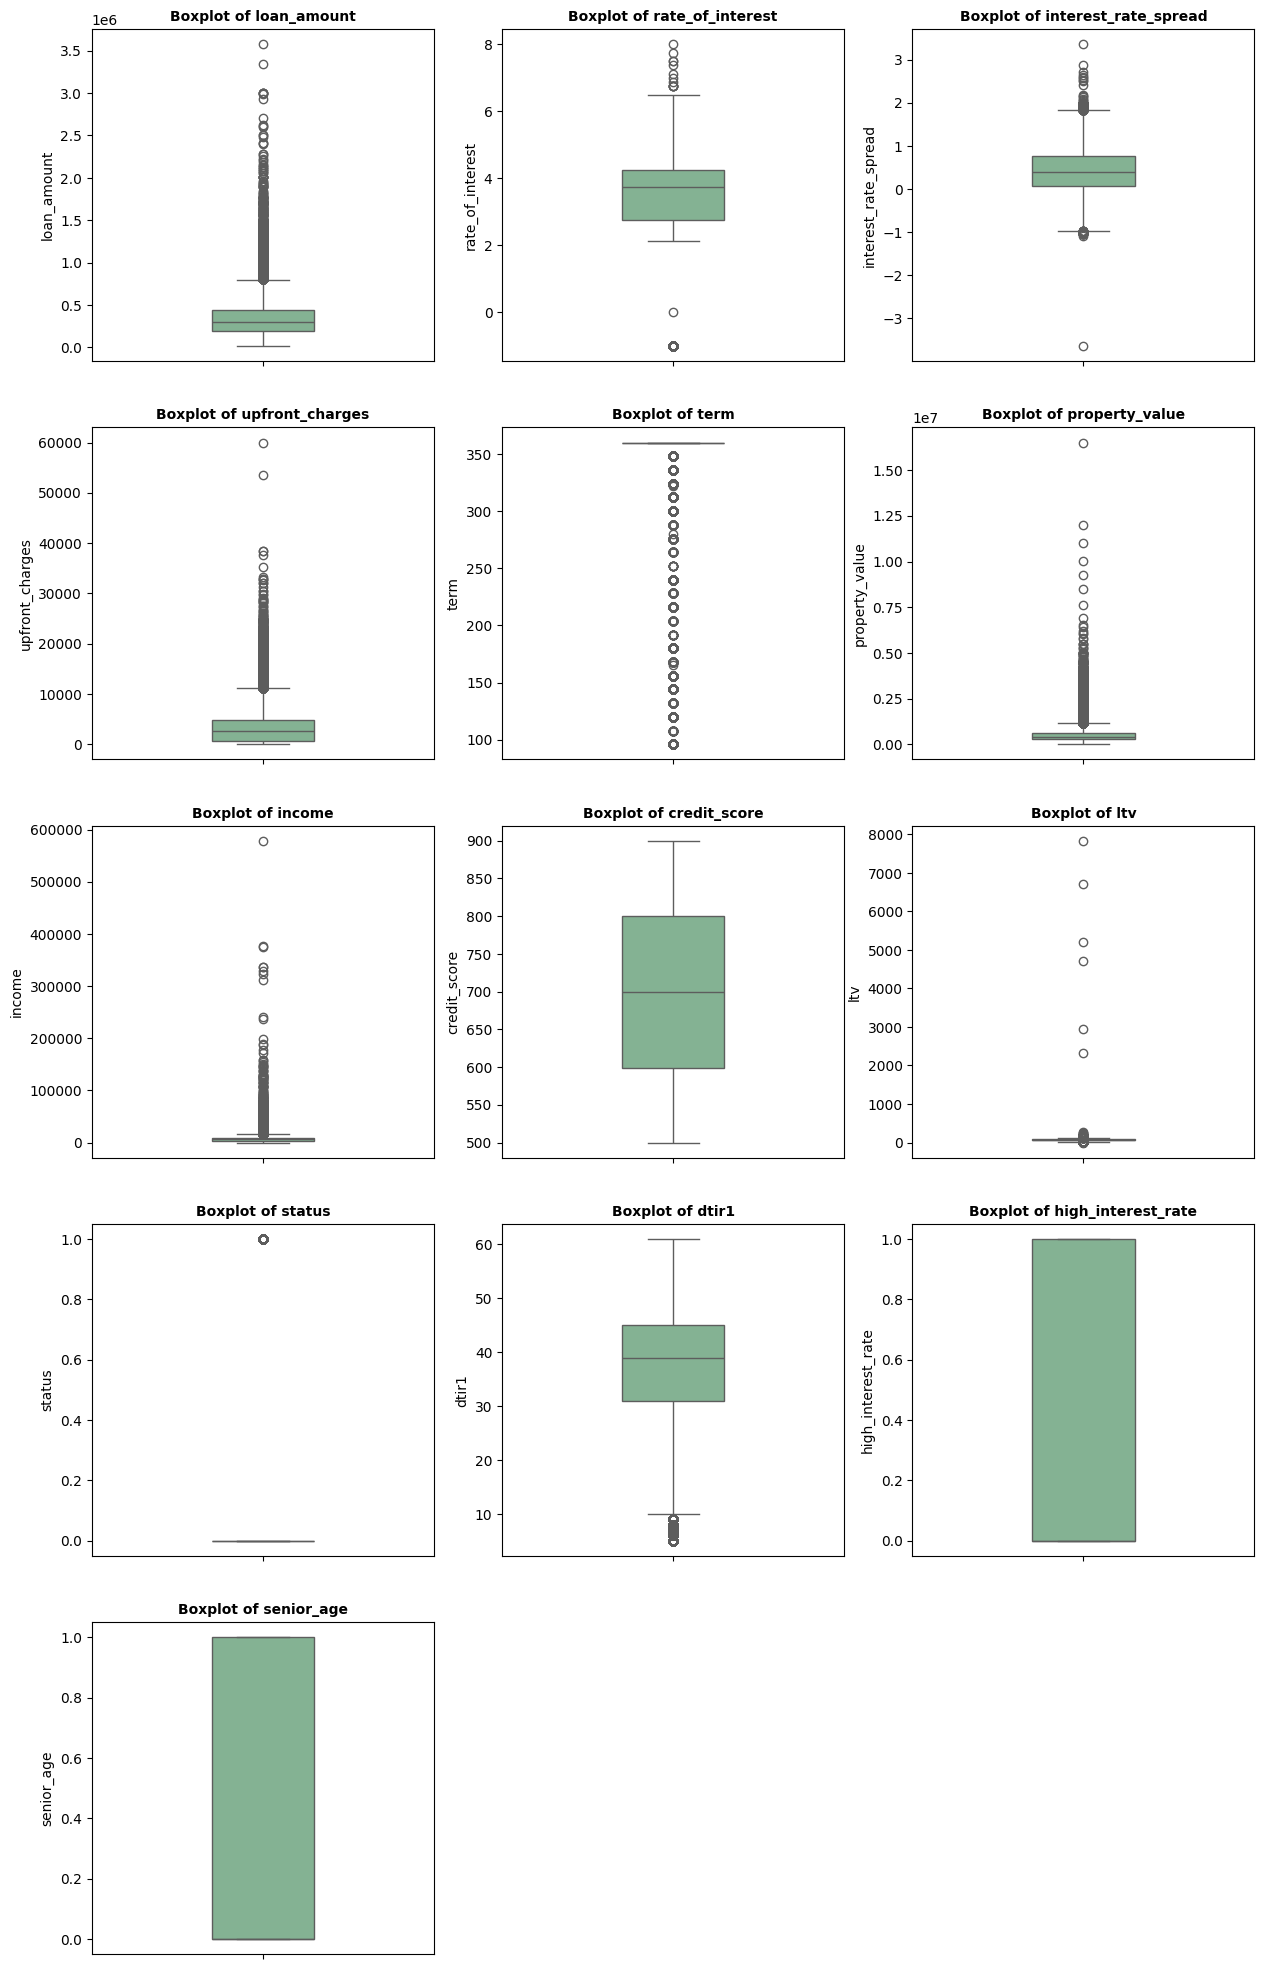

In [17]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()


for i, col in enumerate(df_loan_numeric.columns):
    # removing null/NaN values before plotting it on the boxplot
    sns.boxplot(y=df_loan_numeric[col].dropna(), ax=axes[i], width=0.3)
    sns.set_palette("crest")
    axes[i].set_title(f"Boxplot of {col}", fontweight="bold", fontsize=10)

# max(i) is 13 here, but the grid is for 15 subplots and I need to hide the empty ones
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()


In [18]:
# check the distribution of the next features in the dataset
dist_feature_names = ["status", "high_interest_rate", "senior_age"]
df_dist = df_loan_numeric[dist_feature_names]

In [19]:
def calc_subplot_grid(df: pd.DataFrame, cols: int):
    rows = math.ceil(len(df.columns) / cols)
    return rows, cols

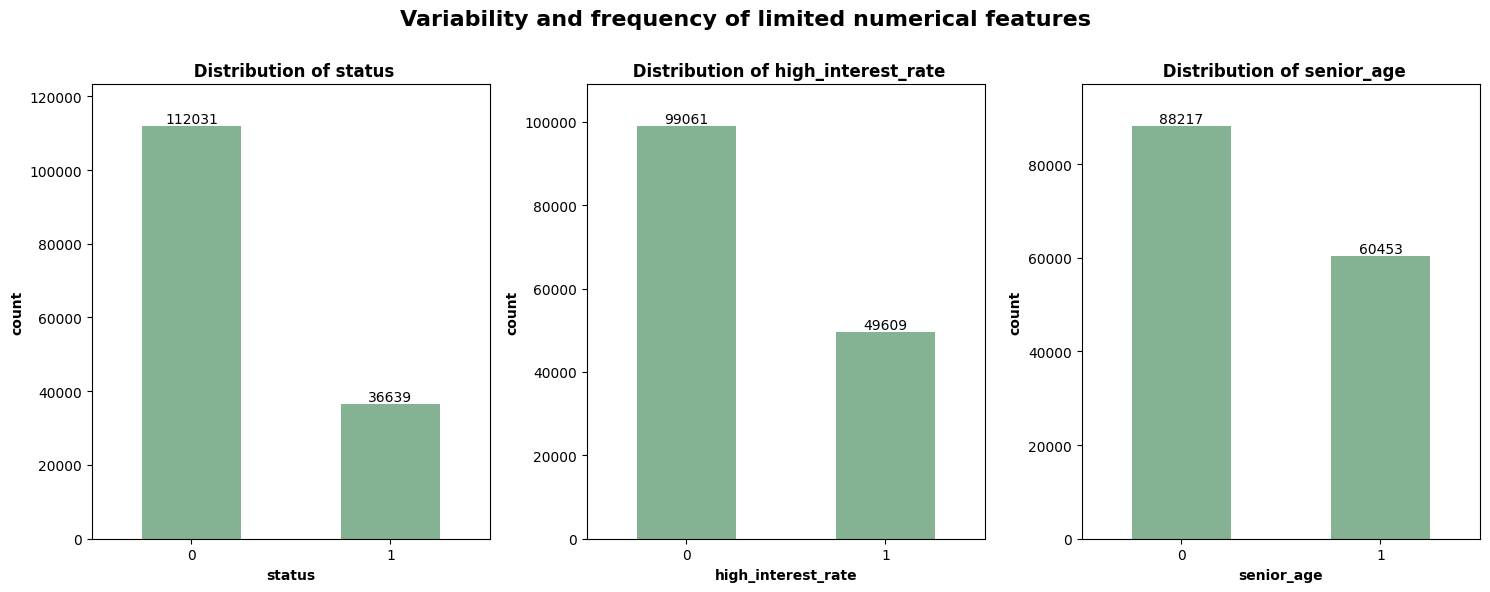

In [20]:
rows, cols = calc_subplot_grid(df_dist, 3)

fig, axes = plt.subplots(rows, cols, figsize=(rows * 15, cols * 2))
axes = axes.flatten()

for i, col in enumerate(df_dist.columns):
    sns.countplot(df_dist, x=col, ax=axes[i], width=0.5)
    sns.set_palette("crest")
    axes[i].set_title(f" Distribution of {col}", fontweight="bold", fontsize=12)
    axes[i].margins(y=0.1)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].set_xlabel(col, fontweight="bold")
    axes[i].set_ylabel("count", fontweight="bold")

plt.suptitle(
    "Variability and frequency of limited numerical features",
    fontweight="bold",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()


In [21]:
## Conclusion
# staus '1' is very under represented
# high_interest_rate '1' is under represented
# senior_age is roughly balanced
# later we need to take this into consideration when doing the balancing


### 2.3.3 Multivariate analysis for numerical data

Applying correlation matrix and heatmap

In [22]:
# including target variable in correlation matrix is a standard
# helps to reveal potential predictor variables

# pandas corr() excludes null, NaN, NA for the calculation of correlation matrix
corr = round(df_loan_numeric.corr(), 2)

<Axes: >

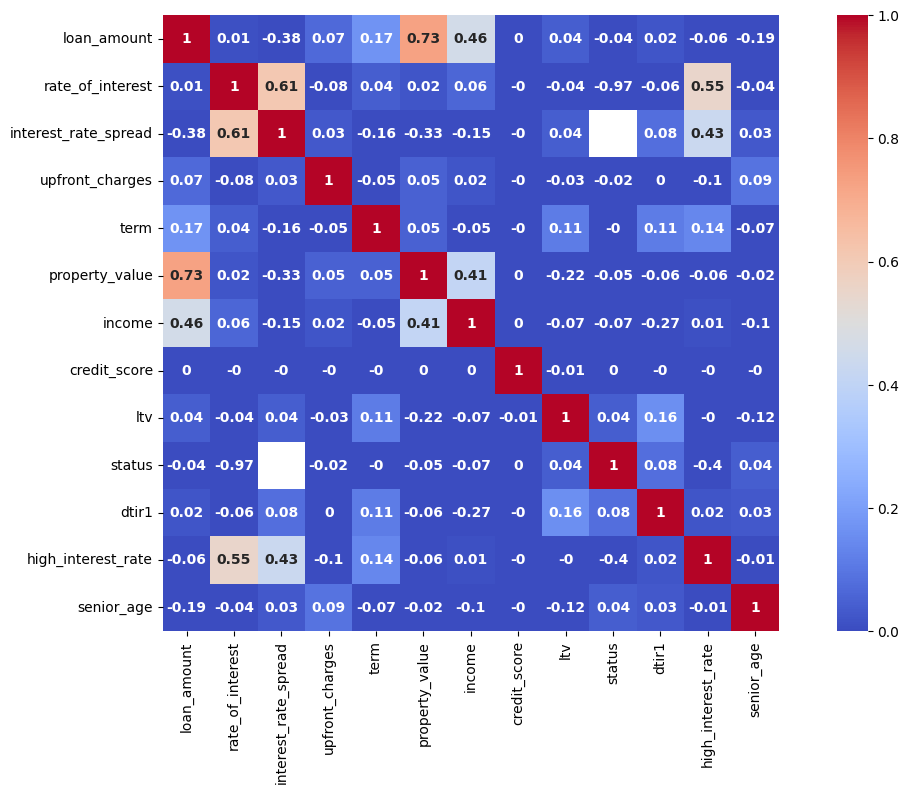

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    square=True,
    vmin=0,
    vmax=1,
    annot_kws={"fontweight": "bold"},
)

In [24]:
df_loan_numeric.columns

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')

## 2.4 Exploratory Data Analysis for categorical features

In [25]:
# select all the non-numerical features from the loan dataset
df_loan_cat = df_loan.select_dtypes(include="object")

### 2.4.1 Handle inconsistent labels/values

In [26]:
# replace '<25' label to '0-25' in age column to keep consistancy in naming
df_loan_cat.loc[df_loan_cat["age"] == "<25", "age"] = "0-25"
df_loan.loc[df_loan["age"] == "<25", "age"] = "0-25"

# fix inconsitent region names south -> South, central -> Central etc
df_loan_cat.loc[df_loan_cat["region"] == "central", "region"] = "Central"
df_loan_cat.loc[df_loan_cat["region"] == "south", "region"] = "South"
df_loan_cat.loc[df_loan_cat["security_type"] == "Indriect", "security_type"] = (
    "indirect"
)

### 2.4.2 Univariate analysis for categorical data

In [27]:
# null values by column
# df_loan.isnull().sum()

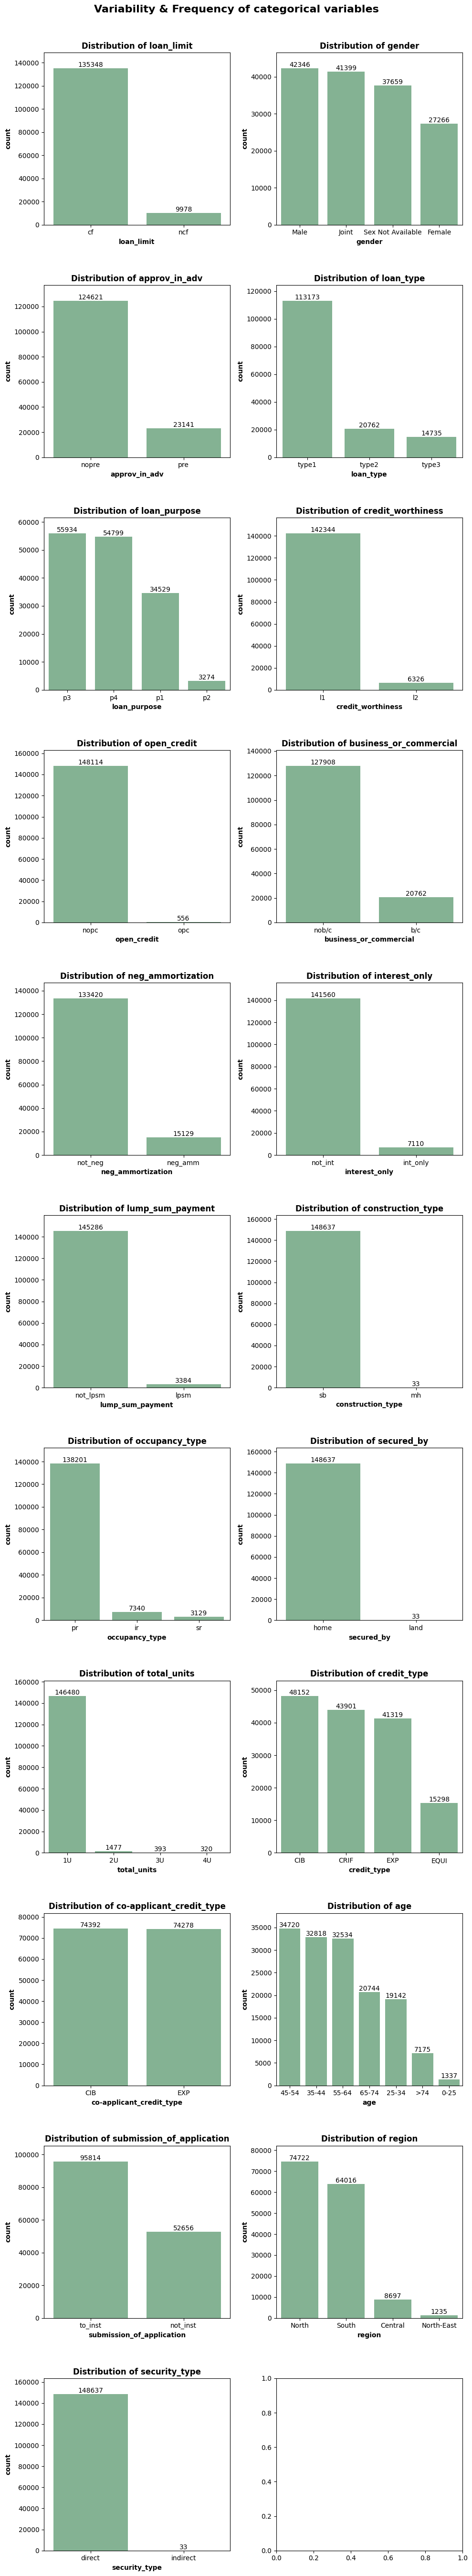

In [28]:
# calculate a gird for the subplots
rows, cols = calc_subplot_grid(df_loan_cat, 2)

# check variety of values in categorical data
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(df_loan_cat.columns):
    sns.countplot(
        data=df_loan_cat, x=col, ax=axes[i], order=df_loan_cat[col].value_counts().index
    )
    sns.set_palette("crest")
    axes[i].set_title(f"Distribution of {col}", fontweight="bold", fontsize=12)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].margins(y=0.1)
    axes[i].tick_params(axis="x", rotation=0)
    axes[i].set_xlabel(col, fontweight="bold")
    axes[i].set_ylabel("count", fontweight="bold")


fig.suptitle(
    "Variability & Frequency of categorical variables", fontweight="bold", fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.subplots_adjust(hspace=0.35)
plt.show()

In [29]:
# Conclusion

# No high-cardinality features are detected / the variability of categorical features < 8 in every column
# (The value set is not much)
# Imbalanced categorical features

# - loan_limit
# - approv_in_adv
# - loan_type
# - credit_worthiness
# - open_credit
# - business_or_commercial
# - neg_ammortization
# - interest_only
# - lump_sum_payment
# - construction_type
# - occupancy_types
# - secured_by
# - total units
# - region
# - security_type

### 2.4.3 Multivariate analysis

Apply frequency table method to categorical features + target value

In [30]:
# parameters: pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

# frequency/ contingency table / two-way frequency table
def relative_frequency_table(data: pd.DataFrame, col: str, column: str):
    freq_table = pd.crosstab(index=data[col], columns=data[column], margins=True)
    rel_table = round(freq_table / freq_table.loc["All"], 3) * 100
    return rel_table


# make a special form of the frequency table to make it redy to plot on a groupped barchart
# applying melt() to transform the DataFrame
def melt_df_for_barplot(
    data: pd.DataFrame, id_feature: str, feature_name: str, new_value_name: str
):
    # loan_status_relfreq.index.name='status'
    data = data.iloc[:-1, :-1]
    df_melt = data.reset_index().melt(
        id_vars=id_feature, var_name=feature_name, value_name=new_value_name
    )
    return df_melt

In [31]:
target_var = "status"

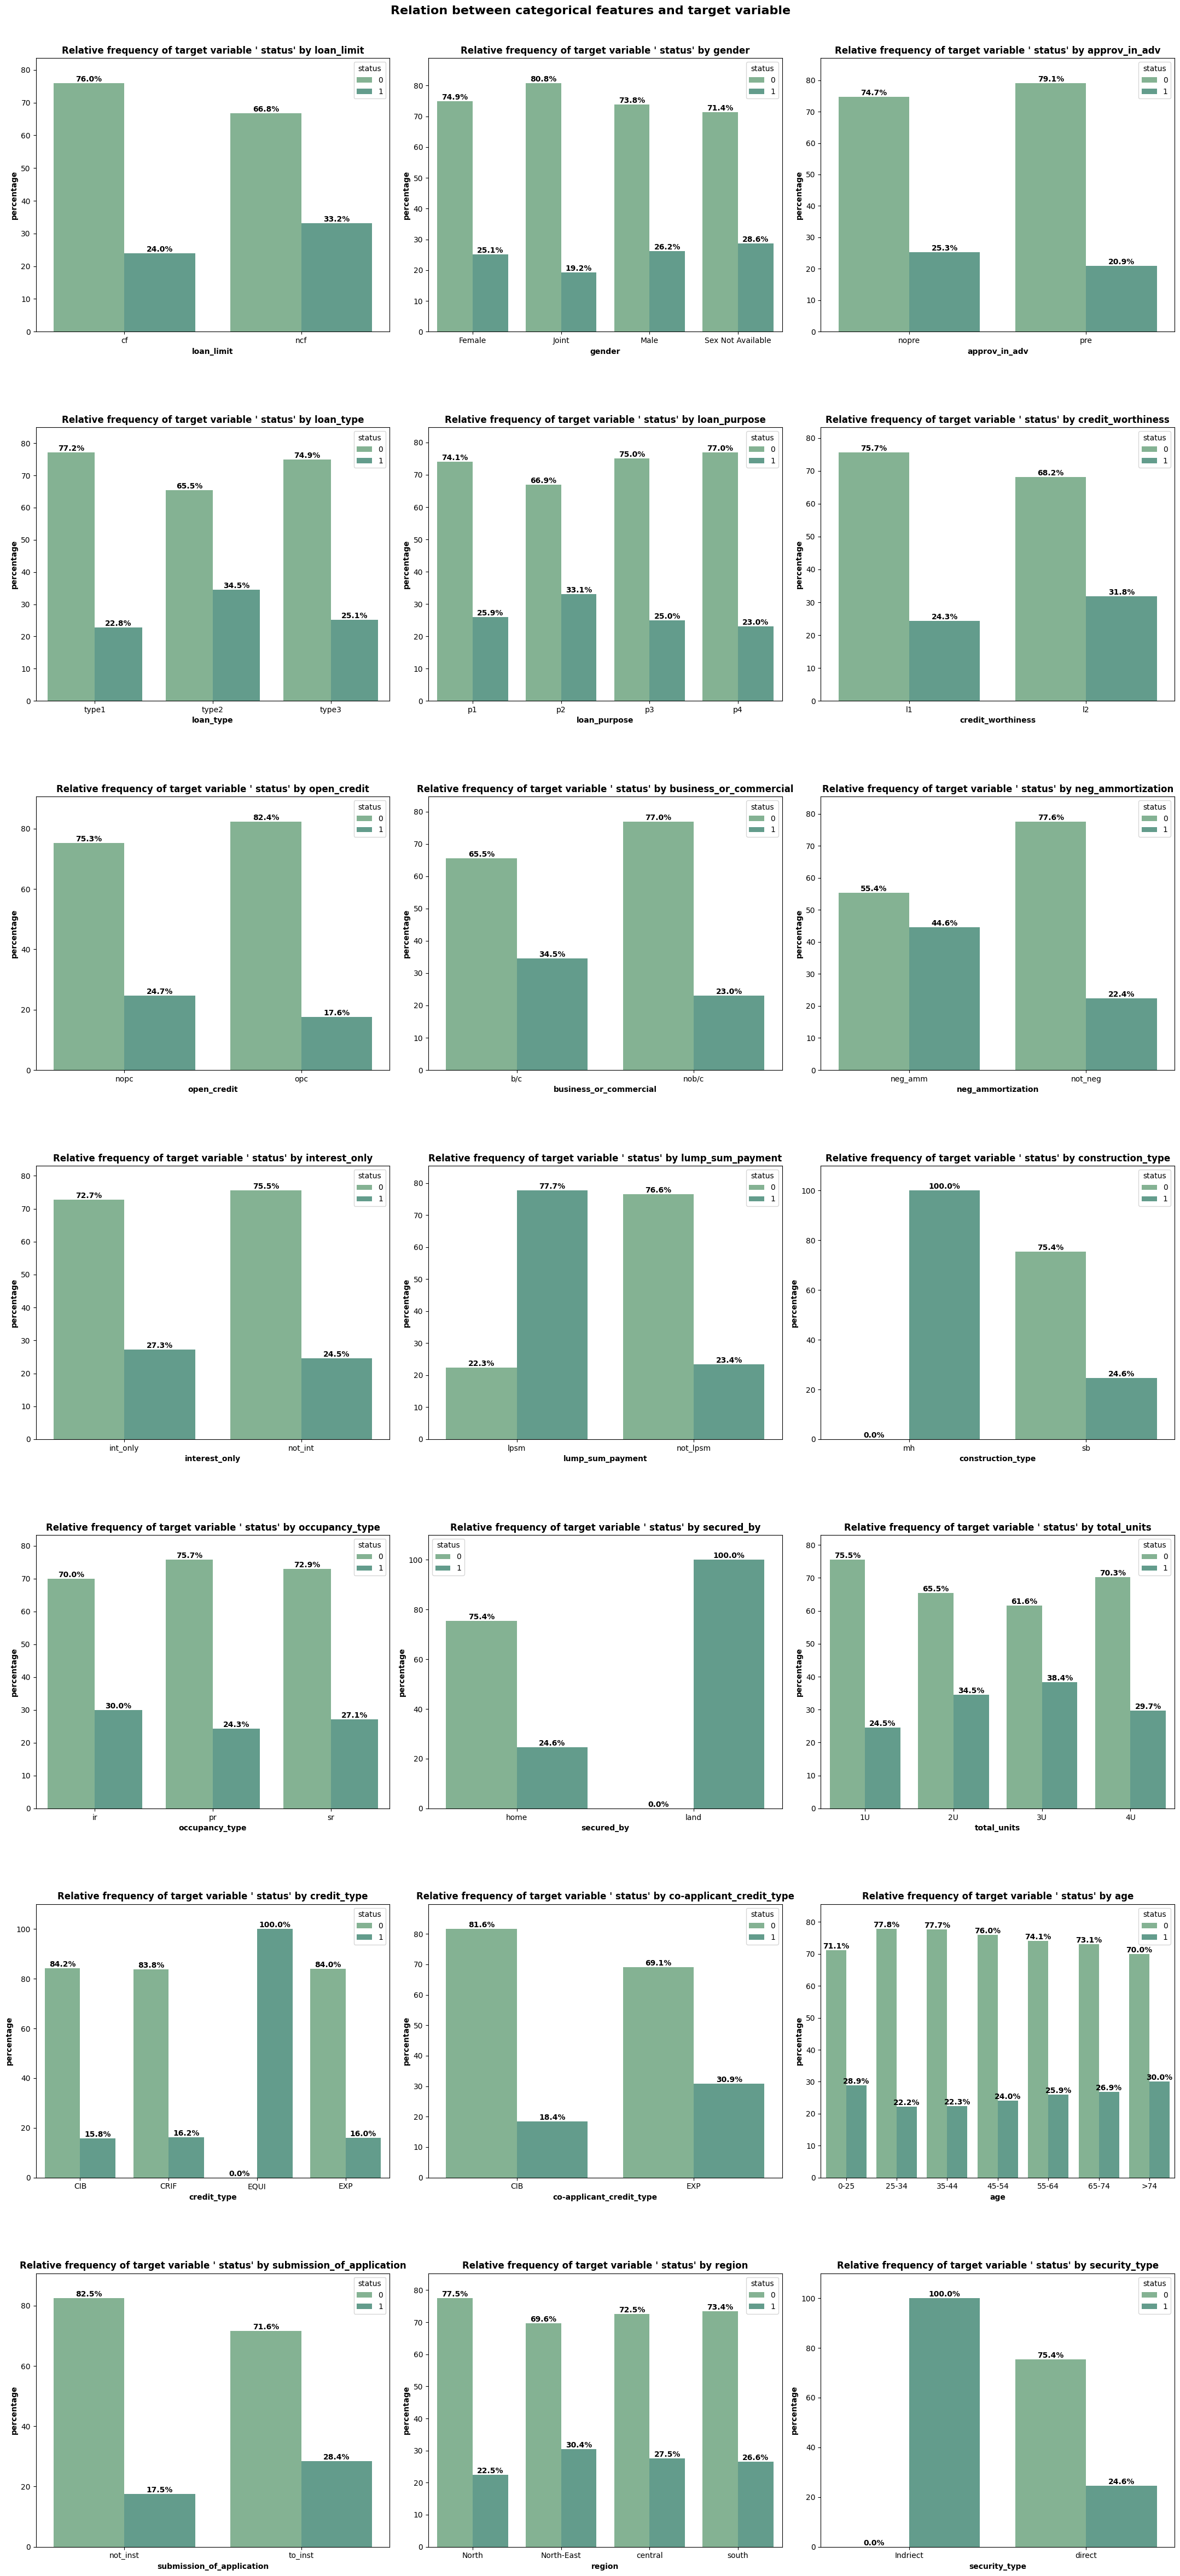

In [32]:
rows, cols = calc_subplot_grid(df_loan_cat, 3)
fig, axes = plt.subplots(rows, cols, figsize=(rows * 3.1, cols * 16))
axes = axes.flatten()

for i, col in enumerate(df_loan_cat.columns):
    status_relfreq = relative_frequency_table(df_loan, target_var, col)
    df_melt = melt_df_for_barplot(
        status_relfreq,
        id_feature=target_var,
        feature_name=col,
        new_value_name="percentage",
    )
    ax = axes[i]
    bars = ax.patches

    sns.barplot(df_melt, x=col, y="percentage", hue=target_var, ax=ax)
    ax.set_title(
        f"Relative frequency of target variable ' {target_var}' by {col}",
        fontweight="bold",
        fontsize=12,
    )
    ax.margins(y=0.1)
    ax.set_xlabel(col, fontweight="bold")
    ax.set_ylabel("percentage", fontweight="bold")

    # Real values from your melted DataFrame
    bar_labels = df_melt["percentage"].tolist()

    # Loop through only real bars, ignore ghost bars
    for bar, label in zip(bars, bar_labels):
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(
                f"{height:.1f}%",
                (bar.get_x() + bar.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )


# Each bar is a matplotlib.patches.Rectangle
# Retrieve them through ax.patches
# bar.get_height() # height of the current bar to write value on
# bar.get_x(): get the position of left edge of the bar
# bar.get_width(): get the with of the current bar
# to avoid plotting ghost bars with labels 0.0%, I need the 'percentages' by each variable from df_melt to keep real bars only

fig.suptitle(
    "Relation between categorical features and target variable",
    fontweight="bold",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.subplots_adjust(hspace=0.35)
plt.show()

In [33]:
loan_status_relfreq = relative_frequency_table(df_loan, "status", "age")

melted_df = melt_df_for_barplot(loan_status_relfreq, "status", "age", "percentages")


# 2.5 Identifying Missing Value Mechanisms

### 2.5.1 Check the Patterns of Missingness

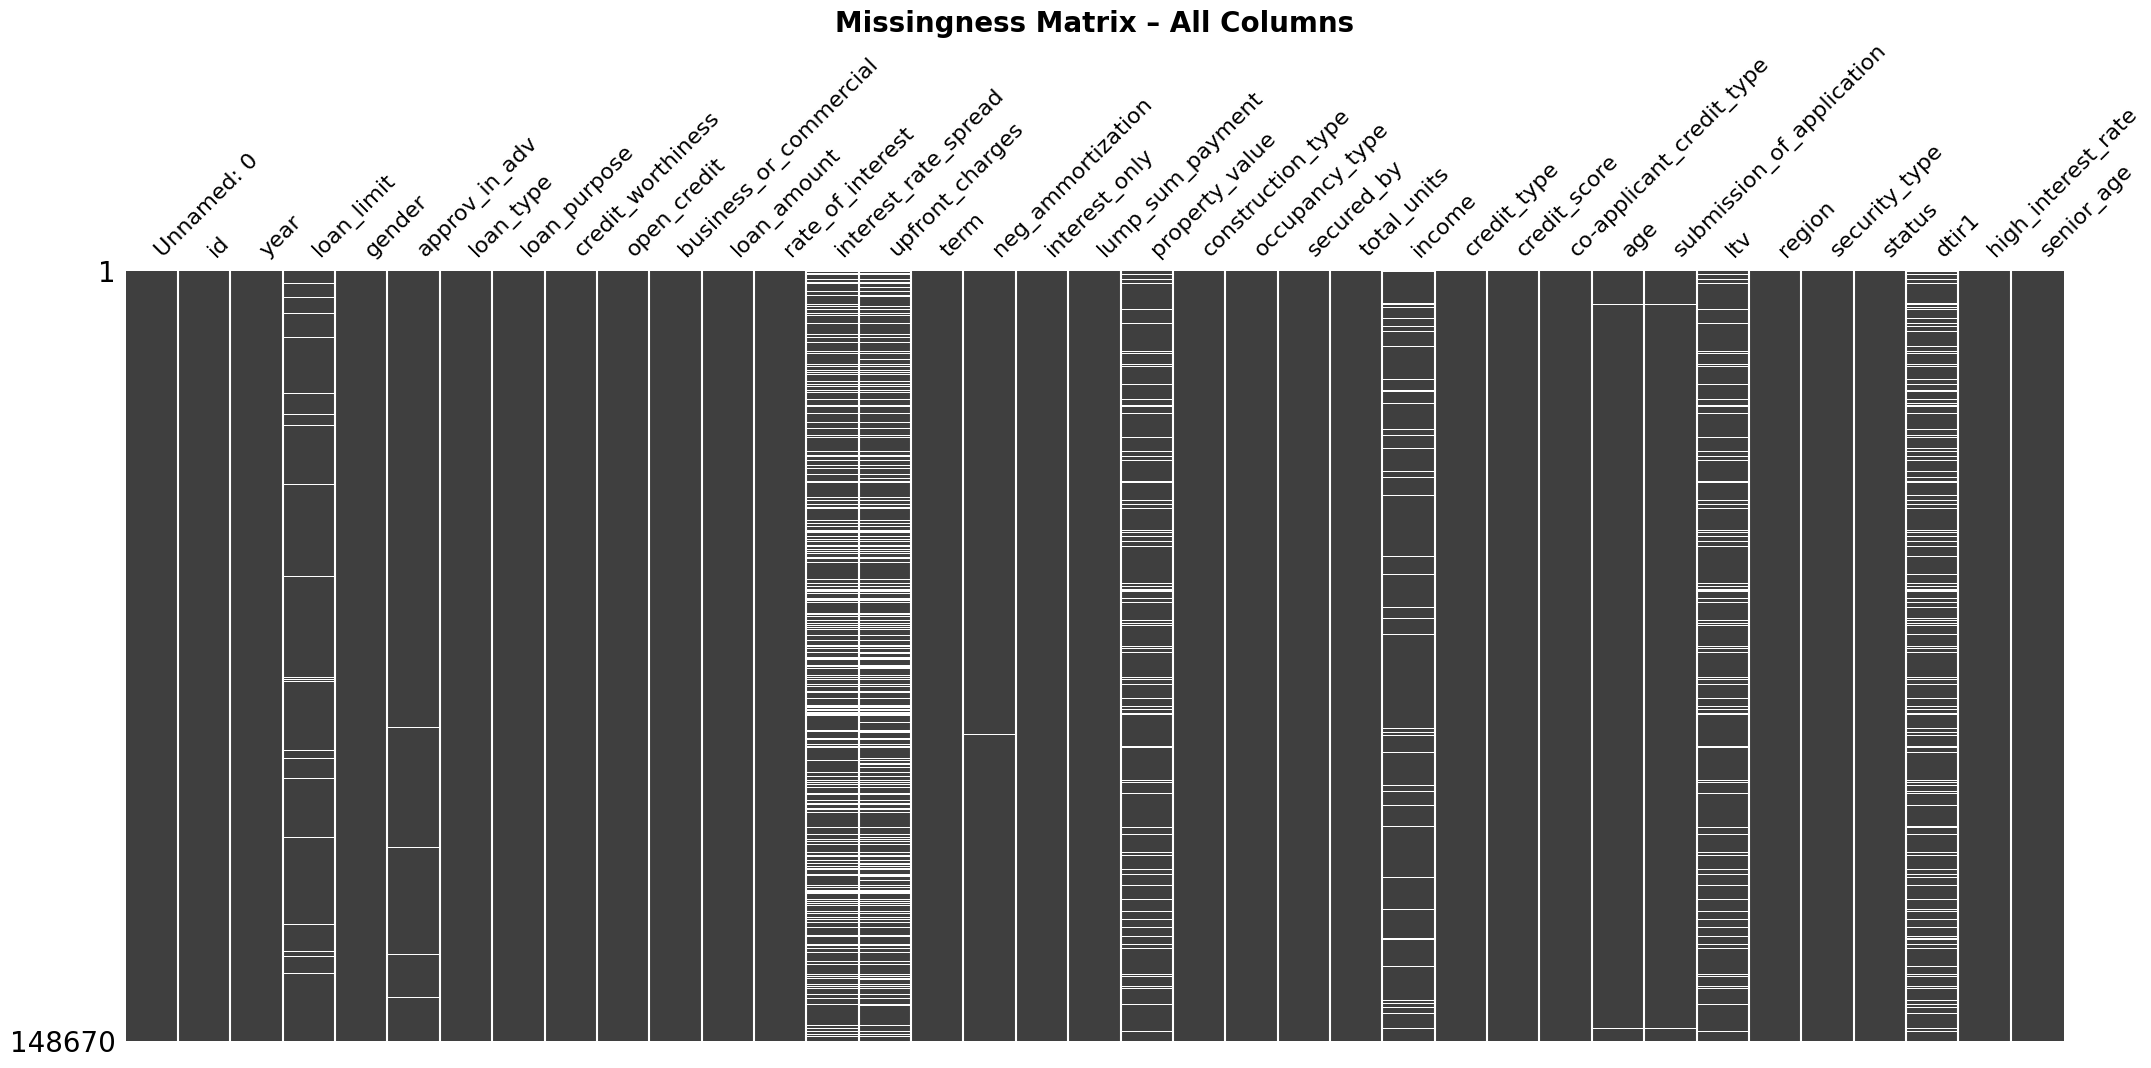

In [94]:
# Missingness Matrix: Row-by-row missingness map
msno.matrix(df_loan, sparkline=False)
plt.title("Missingness Matrix – All Columns", fontsize=20, fontweight="bold")
plt.show()

In [ ]:
# Conclusion
# There is no consecutive missingness in the rows shared between multiple columns. There are fewer columns with high level missingness.
# 'interest_rate_spread' and 'upront_charges' behaves very similar, huge white blocks (missingnes) appear in the same rows
# 'ltv' and 'dtir1' behaves similar
# 'property_value' and 'ltv'  behaves similar

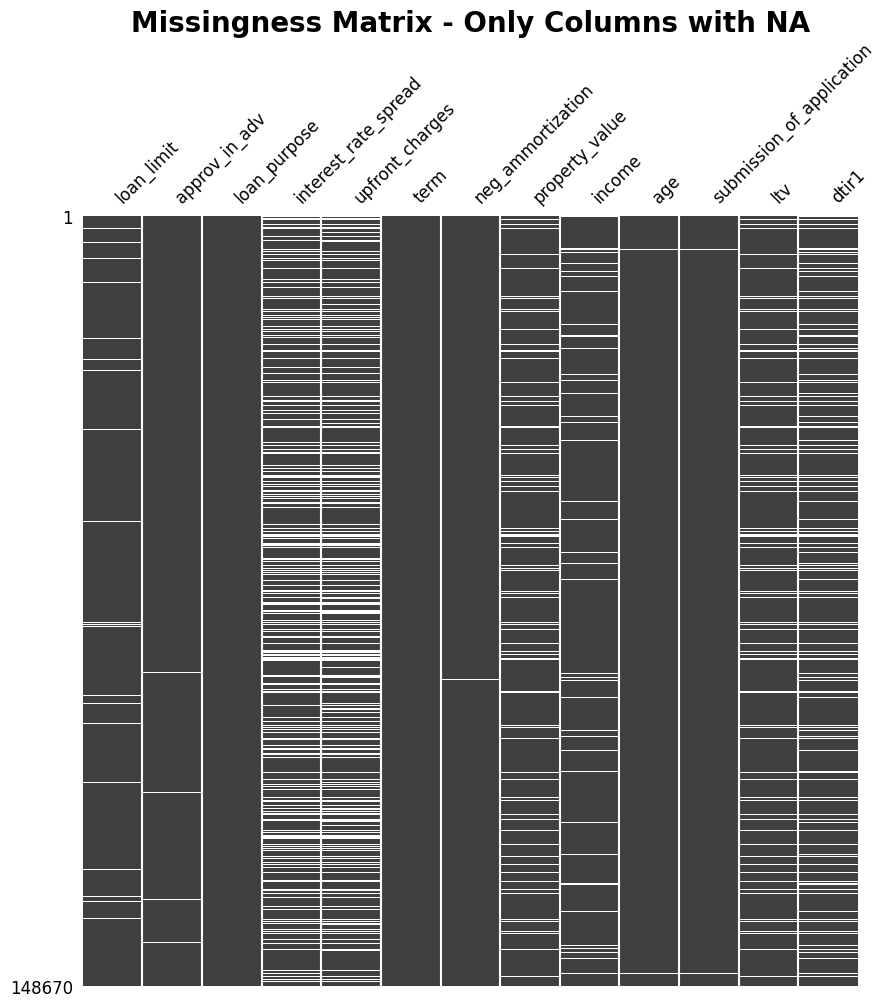

In [104]:
# missingness patterns are visually diluted => passing only columns which contain missing values => focused missingness pattern map
fig, ax = plt.subplots(figsize=(10,10))
msno.matrix(df_loan[df_count_null_val["Features"].to_list()], ax=ax, sparkline=False)
plt.title("Missingness Matrix - Only Columns with NA", fontsize=20, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

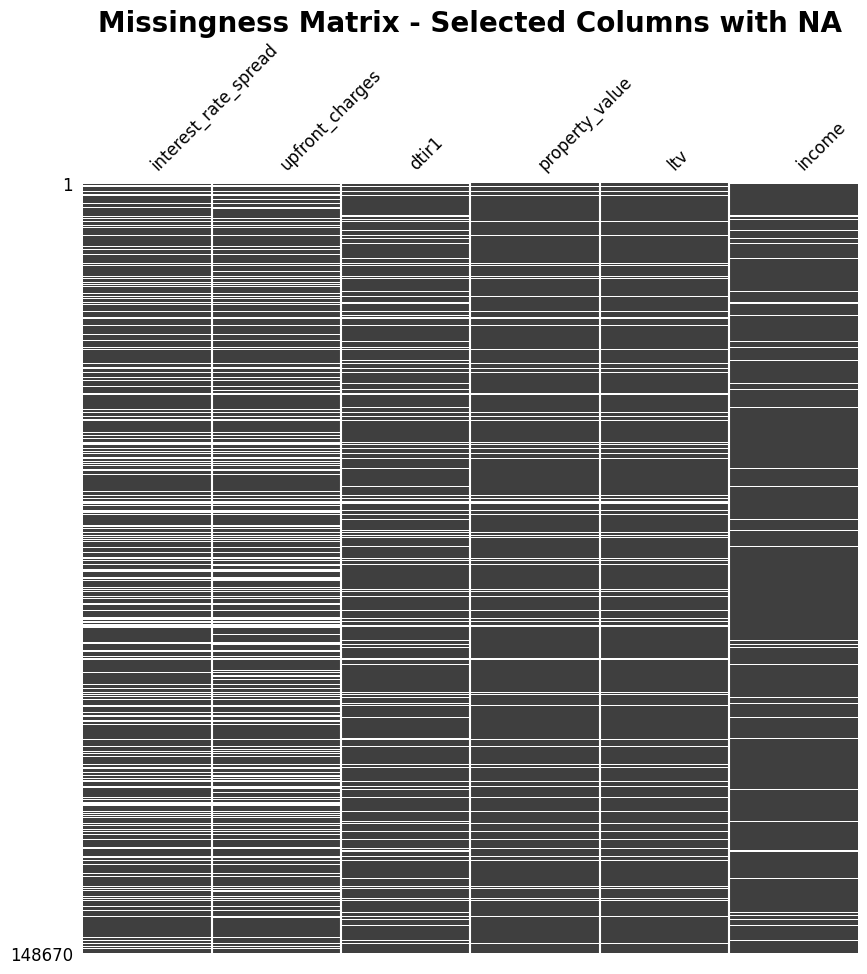

In [103]:
# The missingness is not significant in columns 'approv_in_adv', 'loan_purpose', 'term', 'neg_amortization', 'age', 'submission_of_application' 
# let's compare only the columns with significant missingness within
fig, ax = plt.subplots(figsize=(10, 10))
msno.matrix(df_loan[["interest_rate_spread", "upfront_charges", "dtir1", "property_value","ltv", "income"]], ax=ax, sparkline=False)
plt.title("Missingness Matrix - Selected Columns with NA", fontsize=20, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Conclusion
# 'dtir1' 'poverty_value' 'ltv' sharing significant number of missing values among the same rows

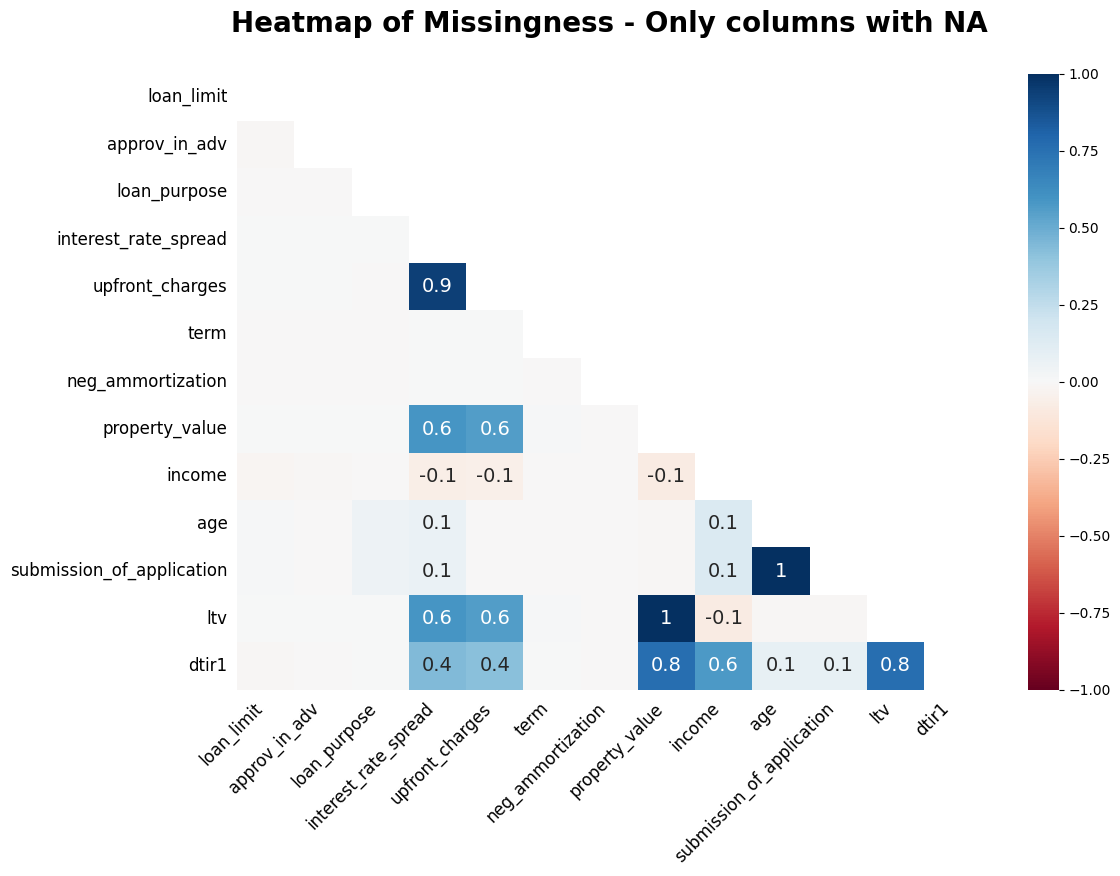

In [105]:
# Heatmap plots how missing values in different columns relate to each other => missingness correlation

fig, ax = plt.subplots(figsize=(12,8))
msno.heatmap(df_loan, ax=ax)
plt.title("Heatmap of Missingness - Only columns with NA", fontsize="20", fontweight="bold", pad=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# Conclusion:

# missingness strongly correlates between:
#  - 'ltv' and 'property_value' => they need same imputation method
#  - 'upfront_charges' and 'interest_rate_spread' => they need the same imputation
#  - 'age' and 'submission_of_application': identical shared missingness
#  - 'dtir1' 'property_value' and 'ltv':  dtir1 strongly linked to both ltv and property_value: missingness cascades

# features with low missingness correlation:
# - 'loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'neg_amortization', 'income'

### 2.5.2 Apply Missingness Indicator Variables
A missingness indicator is a new binary column that tells you whether a value in the original feature is missing or not.
Helps to explore the patterns of missingness.

In [36]:
#  function inserts a new column in to the official dataset if the checked column contains null value
# the new colum get a new name with 'missing_' tag which's rows contains only 1/0
# 1 = the value is missing
# 0 = the value is present

def create_missing_value_indicators(data: pd.DataFrame):
    df_mvi_data = data.copy()
    df_cols = df_mvi_data.columns
    for col in df_cols:
        if df_mvi_data[col].isna().sum() > 0:
            df_mvi_data["missing_" + col] = df_mvi_data[col].isna().astype(int)
    return df_mvi_data

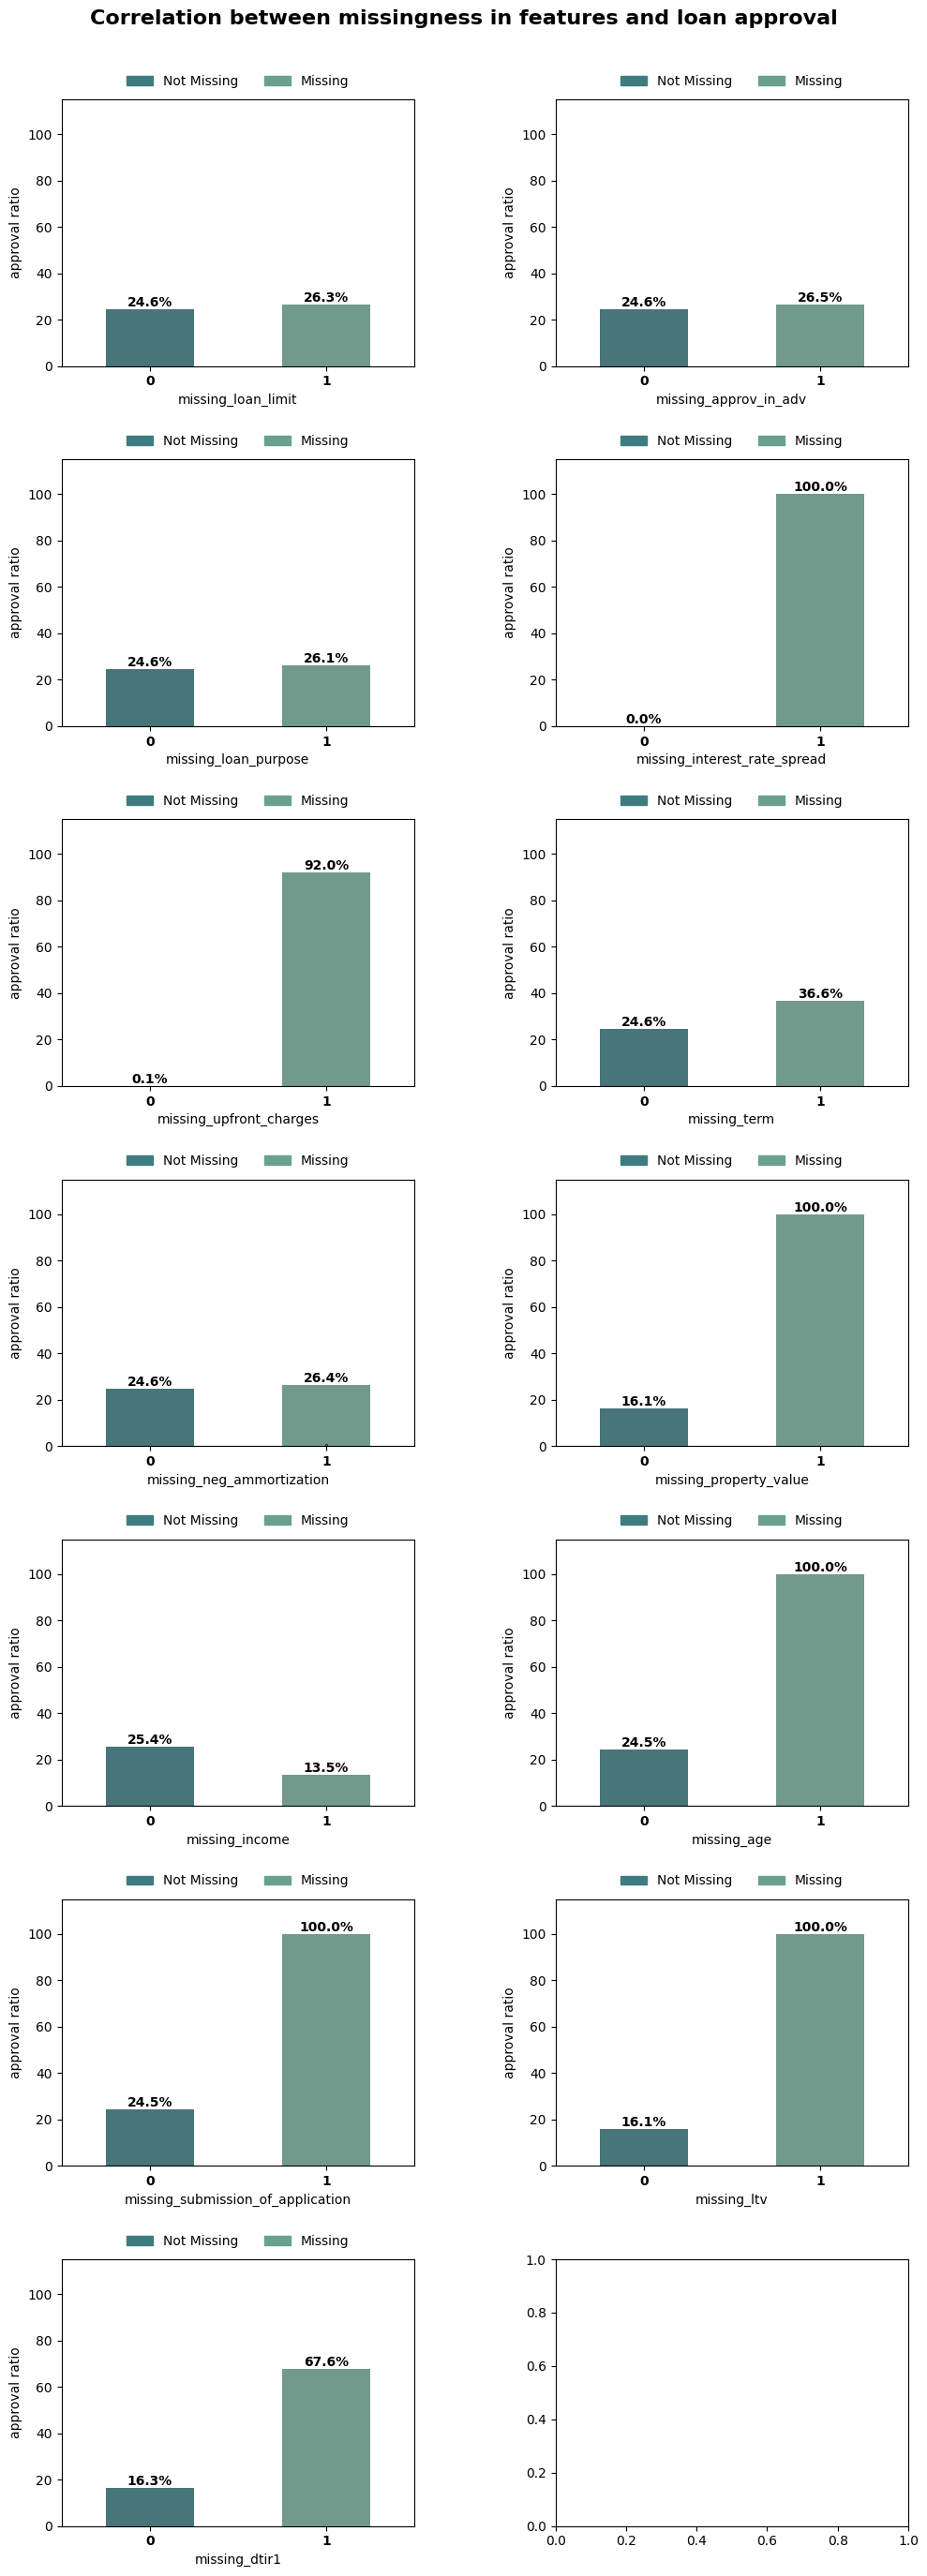

In [37]:
df_mval_indicator = create_missing_value_indicators(df_loan)
rows = 7
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

i = 0
for col in df_mval_indicator.columns:
    if col.startswith("missing_"):
        ax = axes[i]
        sns.barplot(
            x=df_mval_indicator[col],
            y=df_mval_indicator[target_var],
            ax=ax,
            hue=df_mval_indicator[col],
            dodge=False,  # prevents groupped bars
            width=0.5,
            palette=["#3e7c82", "#6aa18e"],
            legend=False,  # use customized legend
        )

        # create new legend
        custom_legend = [
            mpatches.Patch(color="#3e7c82", label="Not Missing"),
            mpatches.Patch(color="#6aa18e", label="Missing"),
        ]
        ax.legend(
            handles=custom_legend,
            title=None,
            loc="lower center",
            bbox_to_anchor=(0.5, 1),
            ncol=3,
            frameon=False,
        )

        ax.set_ylim(0, 115)
        ax.set_xticks([0, 1])  # set position first
        ax.set_xticklabels(["0", "1"], fontweight="bold")
        ax.margins(y=0.10)
        ax.set_ylabel("approval ratio")

        bars = ax.patches
        for bar in bars:
            bar.set_height(bar.get_height() * 100)
            height = bar.get_height()
            if not pd.isna(height):
                ax.annotate(
                    f"{height:.1f}%",
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha="center",
                    va="bottom",
                    fontsize=10,
                    fontweight="bold",
                )

        i = i + 1

fig.suptitle(
    "Correlation between missingness in features and loan approval",
    fontweight="bold",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.975], h_pad=8)
plt.subplots_adjust(hspace=0.35, wspace=0.4)
plt.show()

In [ ]:
## Conclusion:

# Loan is significantly more likely to be approved in rows with missing values in feature

# - interest_rate_spread        (numerical)
# - upfront_charges             (numerical)
# - property_value              (numerical)
# - age                         (categorical)
# - submission_of_application   (categorical)
# - ltv                         (numerical)
# - dtir1                       (numerical)

# This excludes probability of MCAR.
# The missingness in these features (columns) have strong predictive power.

# 'age', 'submission_of_application', 'property_value', 'ltv' show extremely strong MAR behaviour.
#  When the data is missing the ratio of loan approval is 100% (probably policy-driven data collection process)

# 'interest_rate_spread', 'upfront_charges', 'dtir1' show strong MAR behaviour. 
# These variables are only computed for loans that reached a certain stage in the approval workflow (it is consistent with a MAR mechanism)

# 'income' is the feature where the missingness is penalizing
#  It occurs due to not handed in documentation, informal employment, etc. => MAR behaviour

# As these features show strong dependency between missingness and loan approval => missingness indicators are highly predictive (valuable signal)
# => do imputation but keep missingness indicators for model building

# Safe-to-drop features
# 'loan limit, 'approv_in_adv', 'loan_purpose', 'term', 'neg_ammortization' due to weak missingness correlation + target dependence
# => row-wise deletion is unlikely to introduce substantial bias

# 3 Data Quality / Data Cleaning

## 3.1 Drop Rows and Cols with meaningless Missingness 

In [272]:
# Firstly remove unnecessary columns and rows based on the conclusion in EDA

# no valuable info for the model
df_loan.drop(columns=["Unnamed: 0", "id", "year"], axis=1, inplace=True)
df_mval_indicator.drop(columns=["Unnamed: 0", "id", "year"], axis=1, inplace=True)

# rows where null/missing value occurs in columns 'loan_limit, 'approv_in_adv', 'loan_purpose', 'term', 'neg_ammortization'
df_loan.drop(
    df_loan[
        df_loan["loan_limit"].isnull()
        | df_loan["approv_in_adv"].isnull()
        | df_loan["loan_purpose"].isnull()
        | df_loan["term"].isnull()
        | df_loan["neg_ammortization"].isnull()
    ].index,
    inplace=True
)


### 3.2 Inspect Numerical Data Errors

In [126]:
print(df_loan_numeric.columns)

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')


In [266]:
def check_numerical_data_errors(
    df: pd.DataFrame,
    feature: str,
    threshold: float | None = None,
    val_min_max=False,
    accpt_zero=False,
    accpt_neg=False
):
    if accpt_neg is False:
        print(f"error count {feature} < 0: {(df[feature]<0).sum() }")

    if accpt_zero is False:
        print(f"error count {feature} = 0: {(df[feature] == 0).sum()}")

    if threshold is not None:
        print(f"error count {feature} < {threshold}: {(df[feature] < threshold).sum()}")
        print(f"error count {feature} >= {threshold}: {(df[feature] >= threshold).sum()}")

    if val_min_max is True:
        print(f"max {feature}: {df[feature].max()}")
        print(f"min {feature}: {df[feature].min()}")
    print("\n")


In [267]:
# I have to check whether the values are logically/physically implausible/plausible in their context e.g. income can not be negative
# rules are needed to decide what matters realistic/unrealistic data
# Flag implausibe values to 'NaN'

# 1. 'loan_amount'
# - can not be negative or zero
check_numerical_data_errors(df_loan,"loan_amount", val_min_max=True, accpt_zero=False, accpt_neg=False)

# 2. 'rate_of_interest'
# - can not be negative or unrealistically large like 200%
# - upper sanity bound is needed

check_numerical_data_errors(df_loan,"rate_of_interest", threshold=200, val_min_max=True, accpt_zero=True, accpt_neg=False)


# 3. 'interest_rate_spread'
# - can not be negative or unrealistically high like 200%
# - upper sanity bound is needed
check_numerical_data_errors(df_loan,"interest_rate_spread", threshold=200 ,val_min_max=True, accpt_zero=True, accpt_neg=False)


# 4. 'term'
# - can not be negative or zero
# - has to be integer
# - non-standard values e.g. 7 months are suspicious, but retained (short-term loans) 
check_numerical_data_errors(df_loan,"term" ,val_min_max=True, accpt_zero=False, accpt_neg=False)
#print(f"{(df_loan['term']=="integer").all()}\n")

# 5. 'property_value'
# - can not be negative or zero
check_numerical_data_errors(df_loan,"property_value", val_min_max=True, accpt_zero=False, accpt_neg=False)

# 6. 'income'
# - can not be negative (can be zero like unemployed/ retirees)
# - if income is 0, then check the frequency, and flag
check_numerical_data_errors(df_loan,"income", val_min_max=True, accpt_zero=True, accpt_neg=False)


# 7. 'credit_score'
# - difficult to define the rules without knowing in-house banking system
# - has to be [0, 200] or credit_score > 900


# 8. 'ltv' Loan To Value
# - can not be negative or zero
# - rarely unrealistically high like 300%, set treshold, flag it
check_numerical_data_errors(df_loan,"ltv", threshold=300 ,val_min_max=True, accpt_zero=False, accpt_neg=False)



# 9. 'status'
# - has to be 1 or 0, but it is right as I examined the variability of it in EDA
# - no missing value examined in EDA


# 10. 'dtir1' 
# - can not be negative
# - zero menas no debt 
# - can not be negative or zero, but it has to be [1, 100] as the value is expressed in percentage
check_numerical_data_errors(df_loan,"dtir1", threshold=300 ,val_min_max=True, accpt_zero=False, accpt_neg=False)


# 11. 'high_interest_rate'
# - has to be 1 or 0, but it is right as I examined the variability of it in EDA
# - no missing value examined in EDA


# 12. 'senior_age'
# - has to be 1 or 0, but it is right as I examined the variability of it in EDA
# - no missing value examined in EDA










error count loan_amount < 0: 0
error count loan_amount = 0: 0
max loan_amount: 3576500
min loan_amount: 16500


error count rate_of_interest < 0: 35255
error count rate_of_interest < 200: 144122
error count rate_of_interest >= 200: 0
max rate_of_interest: 8.0
min rate_of_interest: -1.0


error count interest_rate_spread < 0: 21417
error count interest_rate_spread < 200: 108687
error count interest_rate_spread >= 200: 0
max interest_rate_spread: 3.357
min interest_rate_spread: -3.638


error count term < 0: 0
error count term = 0: 0
max term: 360.0
min term: 96.0


error count property_value < 0: 0
error count property_value = 0: 0
max property_value: 16508000.0
min property_value: 8000.0


error count income < 0: 0
max income: 578580.0
min income: 0.0


error count ltv < 0: 0
error count ltv = 0: 0
error count ltv < 300: 129519
error count ltv >= 300: 6
max ltv: 7831.25
min ltv: 0.967478198


error count dtir1 < 0: 0
error count dtir1 = 0: 0
error count dtir1 < 300: 120637
error count 